In [1]:
##dealing with the imbalance nature of the data
##!pip install imblearn

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/Users/zhouxinrong/Desktop/PRESC'

In [3]:
Surgical_data = pd.read_csv("datasets/Surgical-deepnet.csv")

In [4]:
Surgical_data

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


Explore the dataset

In [5]:
Surgical_data1 = pd.DataFrame(Surgical_data, columns=["bmi","Age","baseline_diabetes"])
Surgical_data1.describe()

,bmi,Age,baseline_diabetes
count,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.120875
std,8.152709,18.088191,0.325993
min,2.150000,6.100000,0.000000
25%,26.510000,51.500000,0.000000
50%,28.980000,59.700000,0.000000
75%,35.295000,74.700000,0.000000
max,92.590000,90.000000,1.000000


In [6]:
Surgical_data1.dtypes

bmi                  float64
Age                  float64
baseline_diabetes      int64
dtype: object

In [7]:
# split the dataset to X(already know) and y(try to predict)
X = Surgical_data1.drop(["baseline_diabetes"], axis=1)
y = Surgical_data1['baseline_diabetes']
print(y.head())
X.head()

0    0
1    0
2    0
3    1
4    0
Name: baseline_diabetes, dtype: int64


,bmi,Age
0,19.31,59.2
1,18.73,59.1
2,21.85,59.0
3,18.49,59.0
4,19.70,59.0


In [8]:
# I copied this function from https://github.com/mozilla/PRESC-Outreachy-archive/blob/master/dev/Clare-Joyce/winequality.ipynb
# try to do the basic ML prediction and show its metrics
import warnings
warnings.filterwarnings('ignore')

def train_predict(X, y, model, verbose=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_mat =  confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    probs = model.predict_proba(X_test)
    
    print("Accuracy Score of the SVM classifier: \n", acc)
    print("The confusion Matrix: \n", conf_mat)
    print("Recall = ", recall_score(y_test, y_pred))
    print("F1_score = ", f1_score(y_test, y_pred))
    
    if verbose:
        plt.figure(figsize=(8,8))
        sns.heatmap(conf_mat, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
    return X_test, y_test, y_pred, probs

Accuracy Score of the SVM classifier: 
 0.8780321147933037
The confusion Matrix: 
 [[2570    0]
 [ 357    0]]
Recall =  0.0
F1_score =  0.0


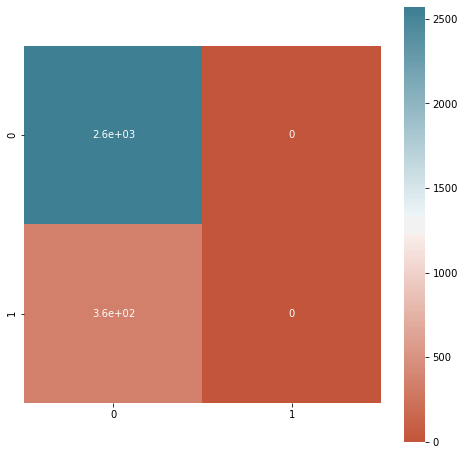

In [9]:
# use SVC to train the model
diabetes_classifier = svm.SVC(probability=True)
xtest, ytest, y_pred, probs = train_predict(X, y, diabetes_classifier, verbose=True)

In [10]:
# try to resample the data
from imblearn.over_sampling import SMOTE
def SMOTE_resampling(X, y):
    """
    Inputs: X the data set of all explanatory variables
            y in the target variable
            
    Functionality: This function is used when there is imablance in the data set.
                   It uses the SMOTE resampling method to generate synthetic points from the minority
                   class to increase it's cardinality.
    Outputs: The output is a data set(data frame) of explanatory variables and the target variable with increased
             number of data points in the minority class.
    """
    smote = SMOTE(random_state = 42)
    x_resampled, y_resampled = smote.fit_resample(X, y)
    return x_resampled, y_resampled

In [11]:
#train the model using the resampled data 
# show its metrics
x_resampled, y_resampled = SMOTE_resampling(X, y)
Xtest, Ytest, Y_pred, probs = train_predict(x_resampled, y_resampled, diabetes_classifier)

Accuracy Score of the SVM classifier: 
 0.7235282688945016
The confusion Matrix: 
 [[1536 1031]
 [ 392 2188]]
Recall =  0.8480620155038759
F1_score =  0.754612864286946


#
I am going to do some conditional metrics analysis based on the result of this training and predecting

In [12]:
# first, put Xtest, Ytest together
testset = pd.concat([Xtest, Ytest], axis=1)

In [13]:
# The followings are my implementing of conditional metrics(#188)
# I worked on these code inspired by presc.misclassifications.misclass_rate.misclass_rate_feature
# I am basically refactoring the functions


# I haven't write any comment yet
# It is just a rough implementation


# I have partitioned the dataset based on the faeture value
# the function allows to compute metrics regarding to the partitions of different feature

#  The function allows any binning for this calculation, which means that
# regularly spaced binnings, disparately spaced binnings that correspond to
# sets of an equal amount of data points (such as quartiles, deciles, or
# n-quantiles), or any other arbitrary irregular binning can be used.

# The function compute the accuracy score, recall score and f1 score for each partition and 
# show them in bar diagrams



def compute_quantiles(dataset, feature, quantiles=4):
    list_quantiles = np.arange(quantiles + 1) / quantiles
    edge_values = np.quantile(dataset[feature], list_quantiles)
    return edge_values

def metrics_feature(
    test_dataset,
    test_predictions,
    feature,
    categorical=False,
    bins=10,
    bins_type="regular",
    
):  
    if 'pred' not in test_dataset.columns:
        test_dataset['pred'] = test_predictions
        
    pred_col_index = test_dataset.columns.get_loc('pred')
    y_test_name = list(testset.columns)[pred_col_index-1]
    if categorical is False:

        # Computes position of bin edges for quartiles or deciles
        if bins == "quartiles":
            lbls = ['1','2','3','4']
            bins = compute_quantiles(test_dataset, feature, quantiles=4)
            test_dataset['quantiles_'+feature] = pd.qcut(test_dataset[feature], q=4,duplicates="drop",labels= lbls)
        elif bins == "deciles":
            lbls = ['1','2','3','4','5','6','7','8','9','10']
            bins = compute_quantiles(test_dataset, feature, quantiles=10)
            test_dataset['quantiles_'+feature] = pd.qcut(test_dataset[feature], q=10,duplicates="drop",labels= lbls)
        elif type(bins) == int and bins_type == "quantiles":
            lbls = []
            bin_num = bins
            for i in range(1,bins+1):
                lbls.append(str(i))
            bins = compute_quantiles(test_dataset, feature, quantiles=bins)
            test_dataset['quantiles_'+feature] = pd.qcut(test_dataset[feature], q=bin_num,duplicates="drop",labels= lbls)
        
        
        total_histogram_counts, bins = np.histogram(test_dataset[feature], bins)
        
        accuracy_score_list=[]
        recall_score_list = []
        f1_score_list = []
        
        
        ThisGroup = []
        
        for index in range(1,len(total_histogram_counts)+1):
                ThisGroup = test_dataset[test_dataset['quantiles_'+feature]== str(index)]
                test_y = pd.Series(ThisGroup[y_test_name]).to_numpy()
                pred_y = pd.Series(ThisGroup['pred']).to_numpy()
                acc_sc = accuracy_score(test_y,pred_y)
                re_sc = recall_score(test_y,pred_y)
                f1_sc = f1_score(test_y,pred_y)
                accuracy_score_list.append(acc_sc)
                recall_score_list.append(re_sc)
                f1_score_list.append(f1_sc)

        print(accuracy_score_list)
    
        
    return bins,accuracy_score_list,recall_score_list,f1_score_list 

    

def show_metrics_feature(
    test_dataset,
    test_predictions,
    feature,
    categorical=False,
    bins=10,
    bins_type="regular",
    width_fraction=1.0,
):
    result_edges, accuracy_score_list,recall_score_list,f1_score_list  = metrics_feature(
        test_dataset, test_predictions, feature, categorical=categorical, bins=bins, 
        bins_type = bins_type,
    )
    if categorical is False:
        width = np.diff(result_edges)
        width_interval = [bin * width_fraction for bin in width]
        result_edges = result_edges[:-1]
        alignment = "edge"

    plt.ylim(0, 1)
    plt.xlabel(feature)
    plt.ylabel("accuracy score")
    plt.bar(result_edges,accuracy_score_list,width=width_interval,bottom=None,align=alignment,
            edgecolor="white",linewidth=2)
    plt.show(block=False)

    plt.ylim(0, 1)
    plt.xlabel(feature)
    plt.ylabel("recall score")
    plt.bar(result_edges,recall_score_list,width=width_interval,bottom=None,align=alignment,
            edgecolor="white",linewidth=2)
    plt.show(block=False)


    plt.ylim(0, 1)
    plt.xlabel(feature)
    plt.ylabel("f1 score")
    plt.bar(result_edges,f1_score_list,width=width_interval,bottom=None,align=alignment,
            edgecolor="white",linewidth=2)
    plt.show(block=False)


    
    
    
def show_metrics_features(
    test_dataset, test_predictions, bins=10,categorical=False,bins_type="regular",width_fraction=1.0,
):
    
    
   
    # List of features
    feature_list = list(test_dataset.columns)[:-1]

    # Computes position of bin edges for quartiles or deciles
    for feature in feature_list:
        show_metrics_feature(
            test_dataset, test_predictions,feature = feature,bins=bins,
            categorical=categorical,bins_type=bins_type,
            width_fraction=width_fraction
        )




        

[0.7391304347826086, 0.6298600311041991, 0.9154761904761904, 0.6040268456375839, 0.6506955177743431, 0.6365054602184087, 0.7082683307332294, 0.8090062111801242]


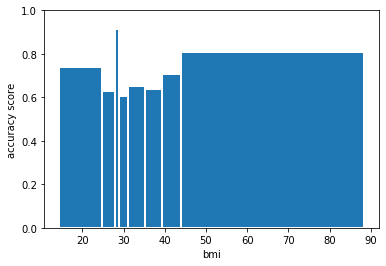

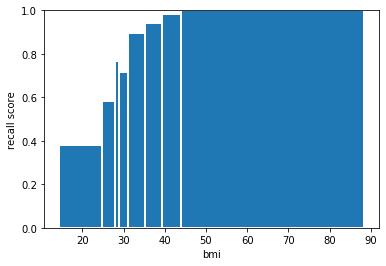

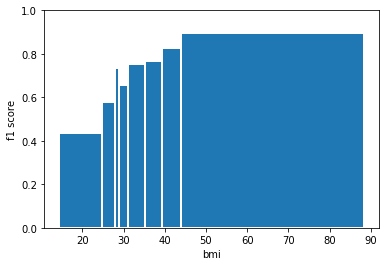

[0.781055900621118, 0.6827371695178849, 0.6584615384615384, 0.6640502354788069, 0.7231726283048211, 0.6625194401244168, 0.6449612403100775, 0.9719626168224299]


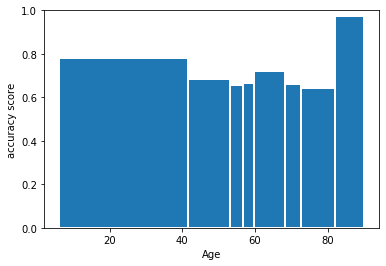

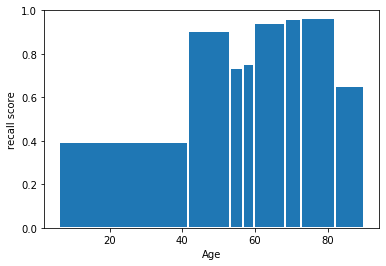

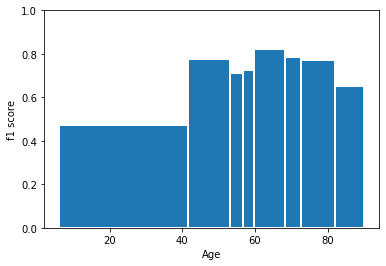

In [14]:
show_metrics_features(testset,Y_pred,categorical=False,bins = 8,bins_type="quantiles",width_fraction=1.0)

# title : Next step

1. implement the confusion matrix for each patition

2. consider about the situation that : When the full dataset with all points does not have any data point in an interval corresponding to a certain bin

3. consider about the situation that : have duplicate bin edge number when binning

4. deal with cataegorical feature

5. test the functions on different dataset and different training model

6. add comments on the functions

7. decribe what the functions do and their parameters and returns

8. try to find some other ways other than bar diagram to show the report 
